In [ ]:
pip install -r requirements.txt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

In [ ]:
data = pd.read_csv("DataAnalyst.csv")

In [ ]:
def experience_level(title):
    title = title.lower()
    if 'senior' in title or 'lead' in title:
        return 'Senior'
    elif 'junior' in title or 'entry' in title:
        return 'Junior'
    elif 'intern' in title:
        return 'Intern'
    else:
        return 'Mid-Level'

In [ ]:
data['Average Salary'] = data['Salary Estimate'].apply(extract_salary)

In [ ]:
def extract_salary(salary_str):
    salary_range = re.findall(r'(\d+)K', str(salary_str))
    if len(salary_range) == 2:
        return (int(salary_range[0]) + int(salary_range[1])) / 2 * 1000
    elif len(salary_range) == 1:
        return int(salary_range[0]) * 1000
    else:
        return None

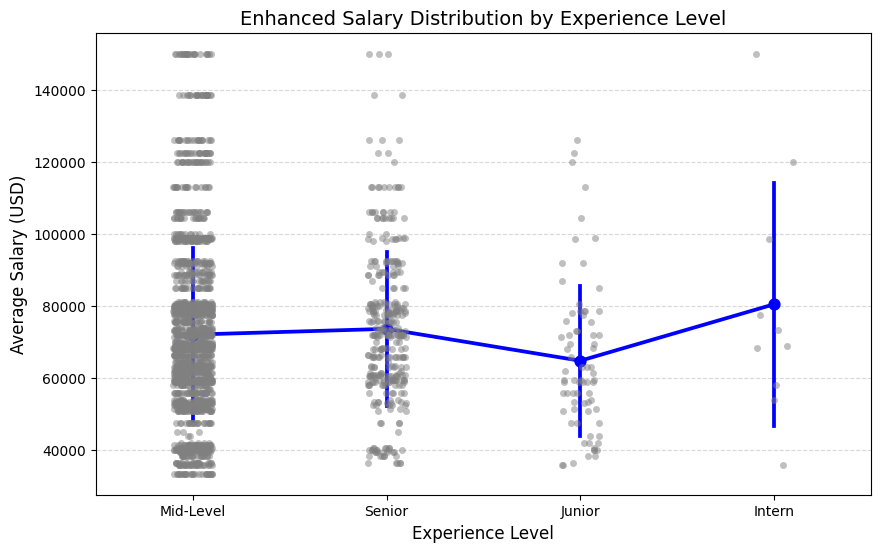

In [ ]:
data['Experience Level'] = data['Job Title'].apply(experience_level)

plt.figure(figsize=(10, 6))

# Strip Plot for individual points
sns.stripplot(data=data, x='Experience Level', y='Average Salary',
               color='gray', alpha=0.5, jitter=True)

# Point Plot for trend visualization
sns.pointplot(data=data, x='Experience Level', y='Average Salary',
              color='blue', markers='o', linestyles='-', errorbar='sd')

# Enhancements
plt.title('Enhanced Salary Distribution by Experience Level', fontsize=14)
plt.ylabel('Average Salary (USD)', fontsize=12)
plt.xlabel('Experience Level', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


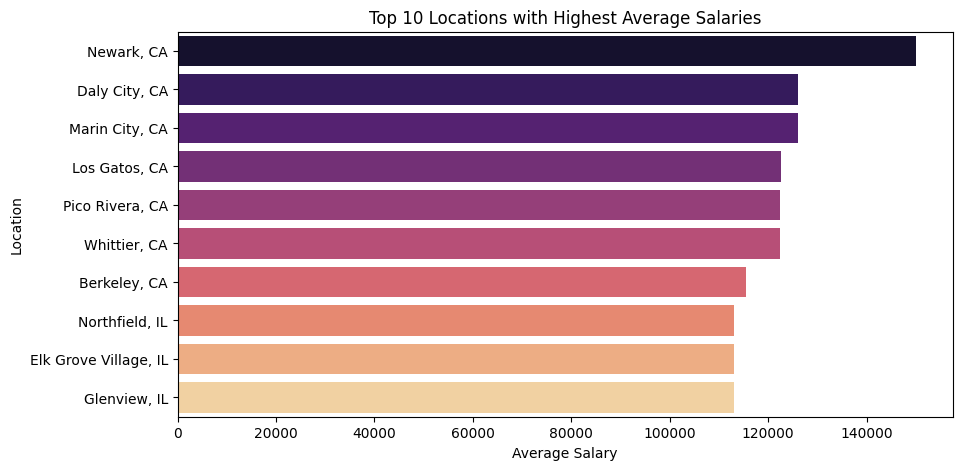

In [ ]:
top_salary_locations = data.groupby('Location')['Average Salary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_salary_locations.values, y=top_salary_locations.index, palette='magma')
plt.title('Top 10 Locations with Highest Average Salaries')
plt.xlabel('Average Salary')
plt.show()

In [ ]:
job_desc_text = ' '.join(data['Job Description'].dropna()).lower()
words = re.findall(r'\b\w{3,}\b', job_desc_text)
word_freq = Counter(words)
common_words = word_freq.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

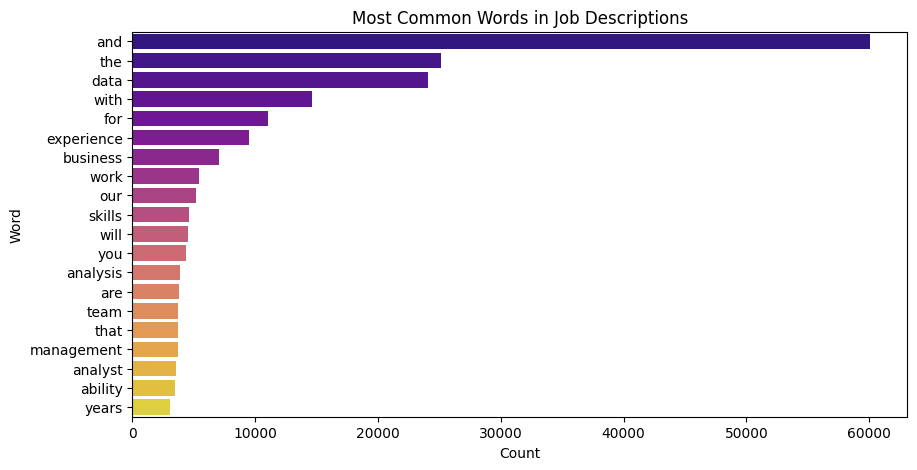

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=common_words_df, x='Count', y='Word', palette='plasma')
plt.title('Most Common Words in Job Descriptions')
plt.show()

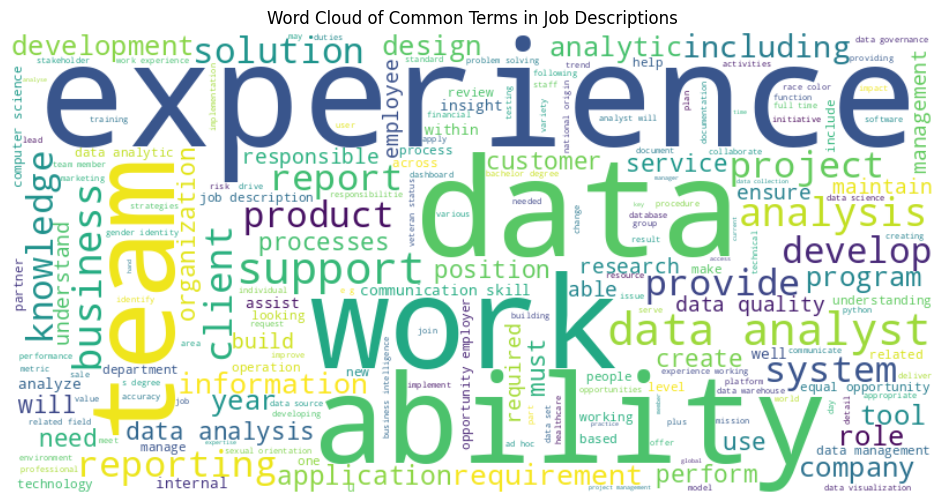

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_desc_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Terms in Job Descriptions')
plt.show()

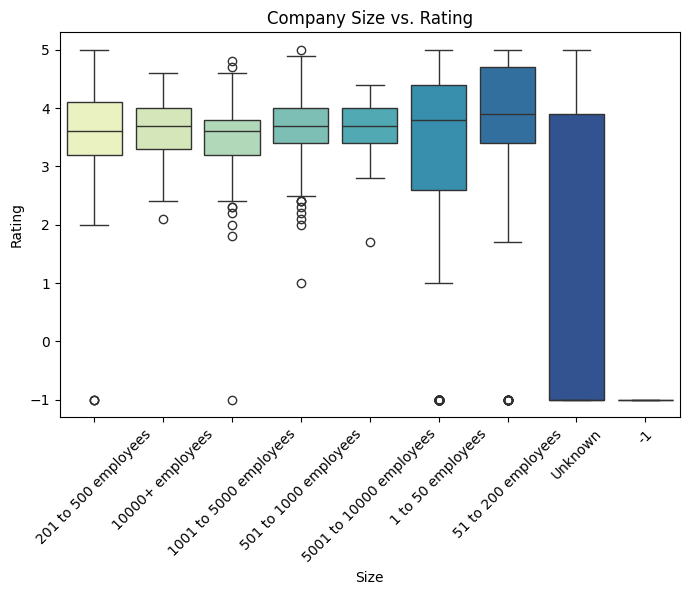

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Size', y='Rating', palette='YlGnBu')
plt.xticks(rotation=45)
plt.title('Company Size vs. Rating')
plt.show()

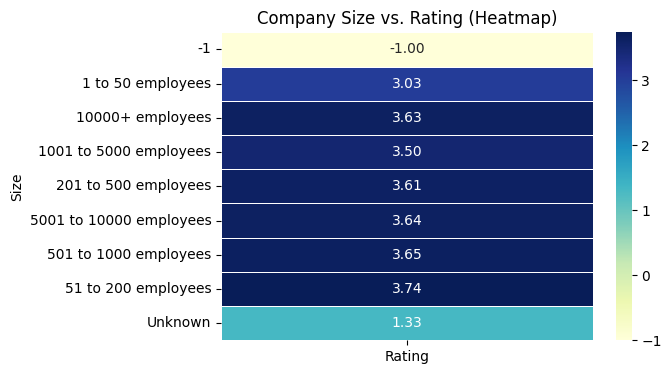

In [ ]:
rating_pivot = data.pivot_table(values='Rating', index='Size', aggfunc='mean')

plt.figure(figsize=(6, 4))
sns.heatmap(rating_pivot, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Company Size vs. Rating (Heatmap)')
plt.show()


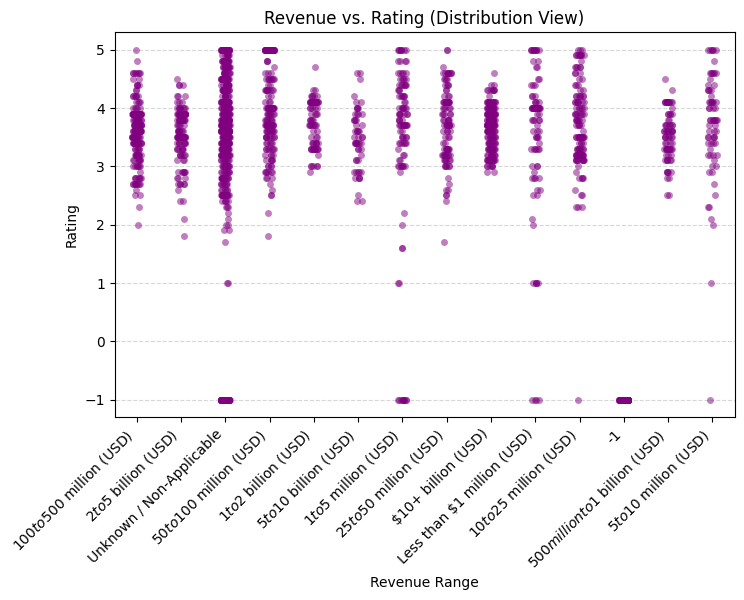

In [ ]:
plt.figure(figsize=(8, 5))
sns.stripplot(data=data, x='Revenue', y='Rating',
              jitter=True, alpha=0.5, color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('Revenue vs. Rating (Distribution View)')
plt.ylabel('Rating')
plt.xlabel('Revenue Range')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


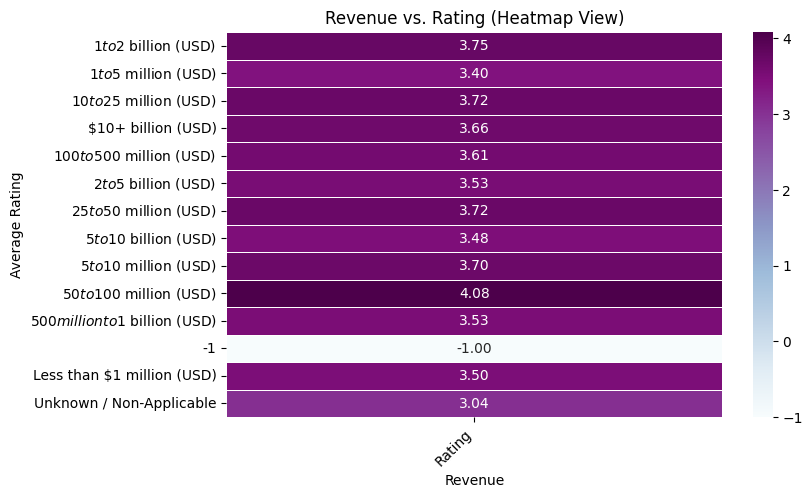

In [ ]:
# Pivot the data for heatmap
heatmap_data = data.pivot_table(values='Rating', index='Revenue', aggfunc='mean')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap='BuPu', annot=True, fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Revenue vs. Rating (Heatmap View)')
plt.xlabel('Revenue')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


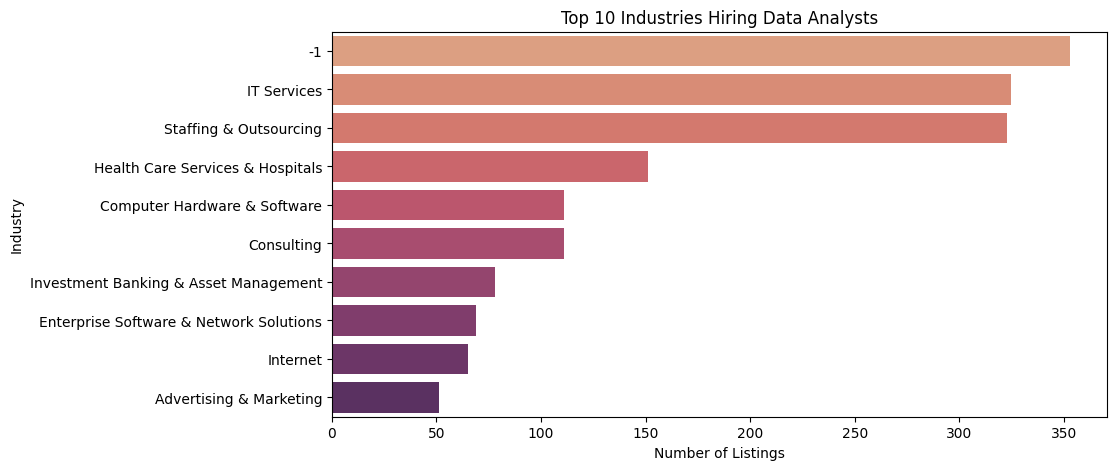

In [ ]:
top_industries = data['Industry'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_industries.values, y=top_industries.index, palette='flare')
plt.title('Top 10 Industries Hiring Data Analysts')
plt.xlabel('Number of Listings')
plt.show()

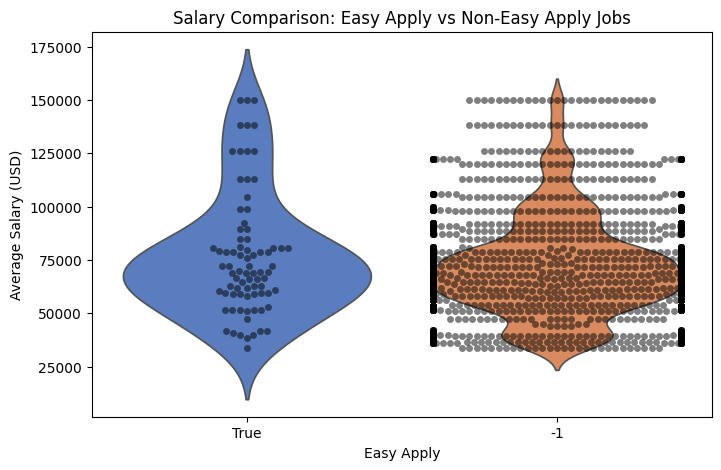

In [ ]:


plt.figure(figsize=(8, 5))

# Violin Plot for Distribution
sns.violinplot(data=data, x='Easy Apply', y='Average Salary', palette='muted', inner=None)

# Swarm Plot for Individual Data Points
sns.swarmplot(data=data, x='Easy Apply', y='Average Salary', color='k', alpha=0.5)

plt.title('Salary Comparison: Easy Apply vs Non-Easy Apply Jobs')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Easy Apply')
plt.show()


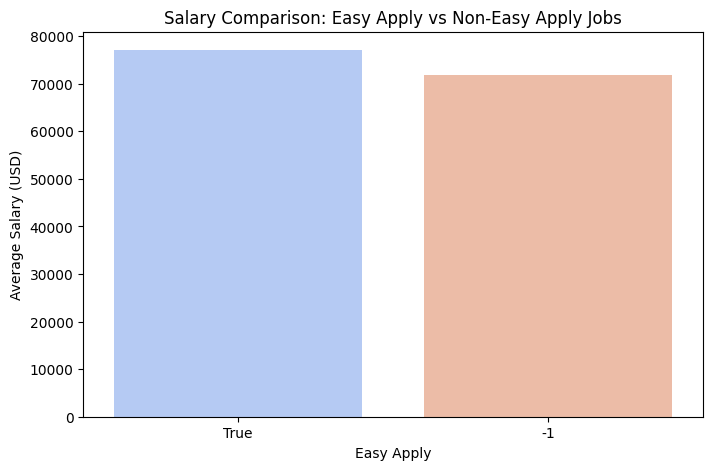

In [ ]:
plt.figure(figsize=(8, 5))

# Bar plot for average salary comparison
sns.barplot(data=data, x='Easy Apply', y='Average Salary', palette='coolwarm', ci=None)

plt.title('Salary Comparison: Easy Apply vs Non-Easy Apply Jobs')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Easy Apply')
plt.show()


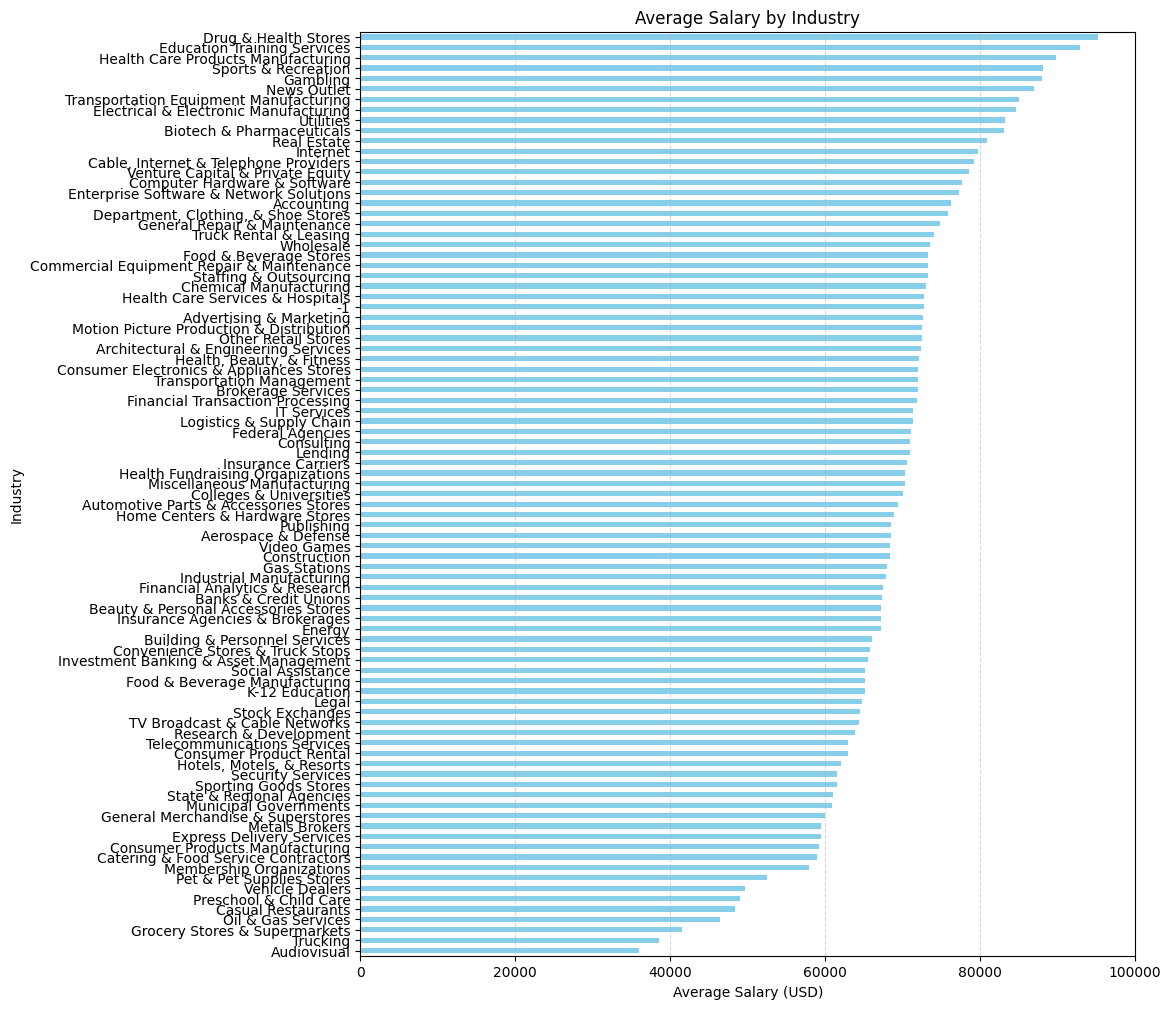

In [ ]:
industry_avg = data.groupby('Industry')['Average Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 12))
industry_avg.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Salary by Industry')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('DataAnalyst.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [ ]:
# Remove rows where the target variable is NaN
df.dropna(subset=[df.columns[-1]], inplace=True)

In [ ]:
# Separate features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
# Map target labels to {0, 1} if necessary
if y.dtype == 'object':
    y = y.astype(str).map({'-1': 0, 'True': 1, 'False': 0})

In [ ]:
# Check for any remaining NaN values in y
y.fillna(y.mode()[0], inplace=True)
print("Unique values in target after processing:", y.unique())

Unique values in target after processing: [1 0]


In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Convert to dense array
])

In [ ]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [ ]:
def evaluate_classifier(name, model, X_train, X_test, y_train, y_test):
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.2f}\n")
    print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{name} - Confusion Matrix')
    plt.show()

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{name} - ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


Logistic Regression Accuracy: 0.97

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       657
           1       1.00      0.11      0.19        19

    accuracy                           0.97       676
   macro avg       0.99      0.55      0.59       676
weighted avg       0.98      0.97      0.96       676



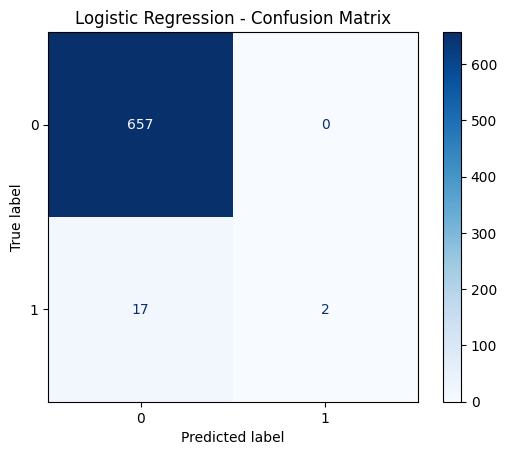

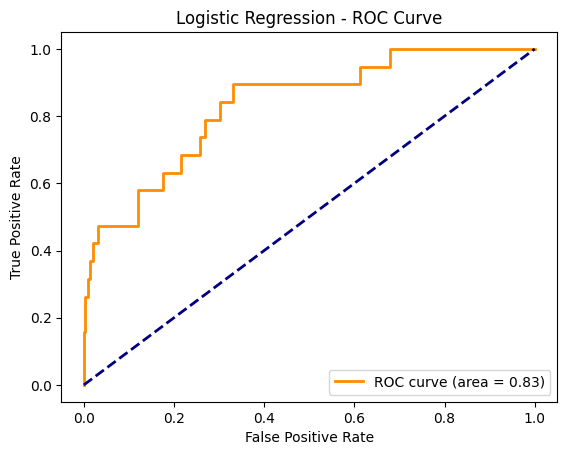


Support Vector Machine Accuracy: 0.97

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       657
           1       1.00      0.11      0.19        19

    accuracy                           0.97       676
   macro avg       0.99      0.55      0.59       676
weighted avg       0.98      0.97      0.96       676



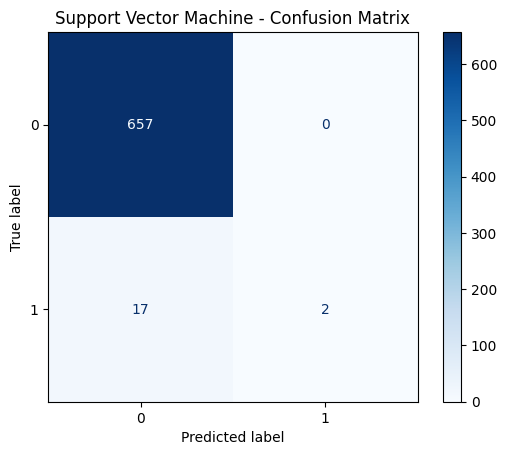

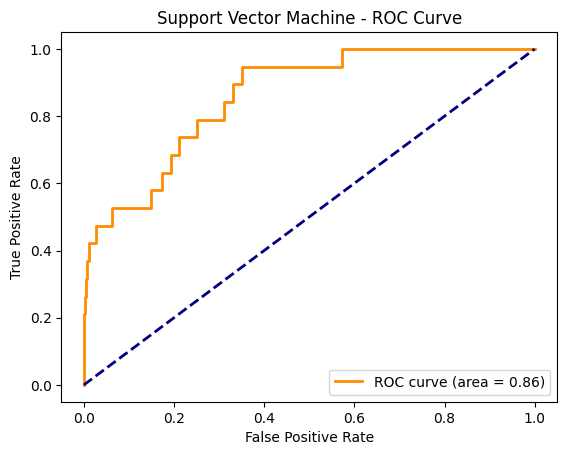


k-Nearest Neighbors Accuracy: 0.97

Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       657
           1       0.38      0.26      0.31        19

    accuracy                           0.97       676
   macro avg       0.68      0.63      0.65       676
weighted avg       0.96      0.97      0.96       676



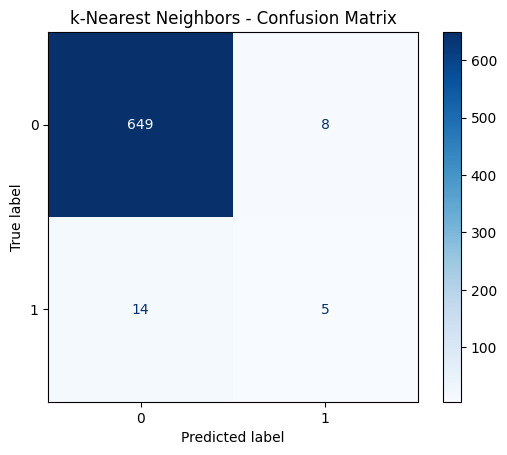

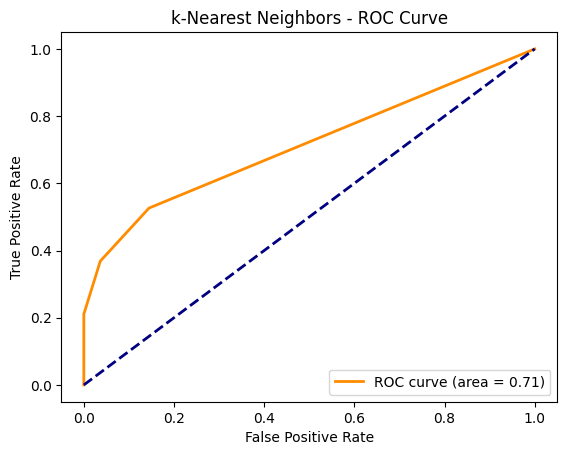


Naive Bayes Accuracy: 0.93

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       657
           1       0.14      0.26      0.18        19

    accuracy                           0.93       676
   macro avg       0.56      0.61      0.57       676
weighted avg       0.95      0.93      0.94       676



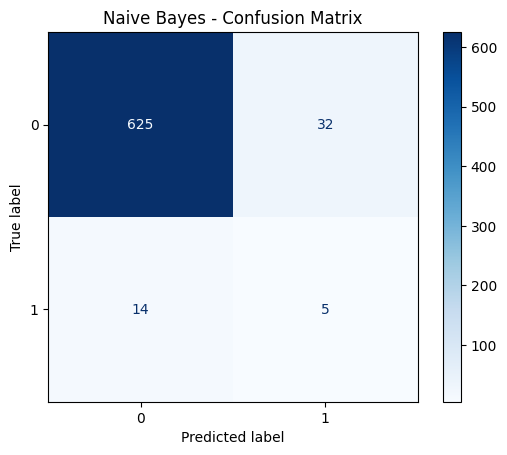

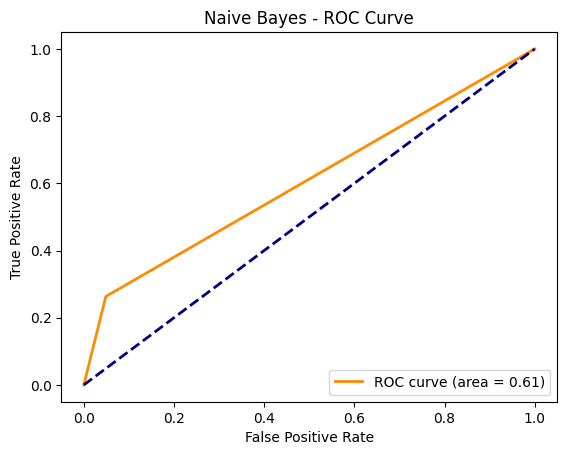


Random Forest Accuracy: 0.98

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       657
           1       1.00      0.21      0.35        19

    accuracy                           0.98       676
   macro avg       0.99      0.61      0.67       676
weighted avg       0.98      0.98      0.97       676



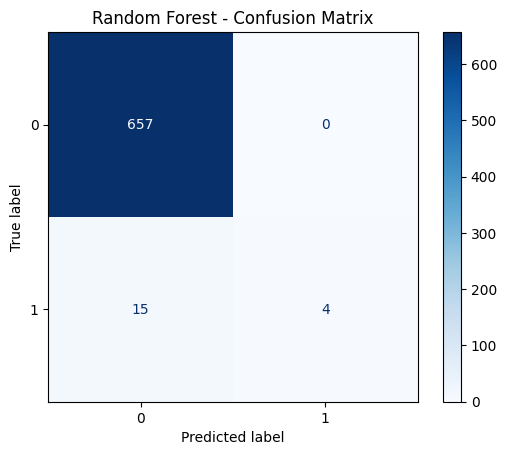

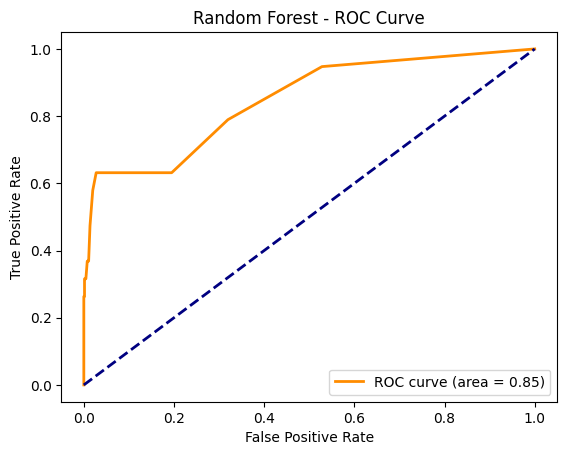

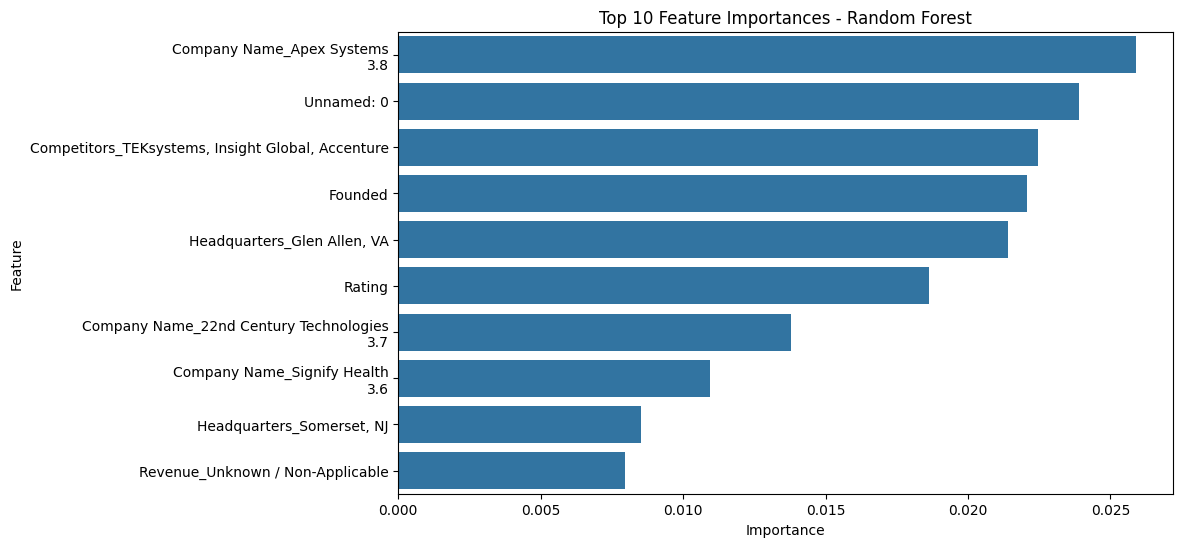

In [ ]:
for name, model in classifiers.items():
    evaluate_classifier(name, model, X_train, X_test, y_train, y_test)

rf_clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
rf_clf.fit(X_train, y_train)
rf_model = rf_clf.named_steps['classifier']

if hasattr(rf_model, 'feature_importances_'):
    feature_importances = rf_model.feature_importances_
    feature_names = numerical_cols.tolist() + \
                    rf_clf.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols).tolist()
    feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_importances.head(10))
    plt.title('Top 10 Feature Importances - Random Forest')
    plt.show()